## Practice 3: $\pi$-pulse calibration

In [1]:
'''Import libraries'''
from qmio import QmioRuntimeService
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

service = QmioRuntimeService()

'''
Uncomment the following line if you are on the in-person course at Cesga, and insert the QPU reservation name.
'''
# service.reservation_name = 

'\nUncomment the following line if you are on the in-person course at Cesga, and insert the QPU reservation name.\n'

In [2]:
'''
Function to run instructions on QPU.
If the job yields an error, the message is printed.
'''

def run_instruction(_backend, _instruction, _shots):
    _res = _backend.run(circuit = _instruction, shots = _shots, res_format = 'raw')
    try :
        return _res["results"].reshape((_shots,))
    except :
        print(_res)

The objective of the practice is to perform an X gate calibration by sweeping the amplitudes of the pulse for a fixed duration. Implement a OpenPulse pulse instruction, leaving the amplitude parameter of the waveform undefined. To do this use the f-string to input variables string with the delimiters { }. Remember the estructure for the OpenPulse instructions:

- ```cal``` block: import frames, declare waveforms.

- ```defcal``` blocks: define the name, objective qubit and play instruction.

Next, call the ```defcal``` function you've defined on the main OpenQASM code and measure the qubit.<br>
<br>

**Important**: as the delimiter for the ```cal``` and ```defcal``` blocks are also { }, you need to double them to be correctly compiled:

```
cal {{

}}

defcal name $QUBIT{{

}}
```

In [3]:
qubit = 8
duration = 500 #dt

def build_instruction(_amp):
    _instruction = f'''
    OPENQASM 3;
    defcalgrammar "openpulse";
        
    cal {{
        extern frame q{qubit}_drive;
        waveform wf = constant({duration}dt, {_amp});
    }}

    defcal custom_pulse ${qubit}{{
        play(q{qubit}_drive, wf);
    }}

    custom_pulse ${qubit};
    measure ${qubit};
    '''
    return _instruction

In [4]:
amplitudes = np.linspace(0.0, 0.2, 100)
shots = 500

p1 = []
with service.backend(name = "qpu") as backend: 
        for amp in amplitudes:
                instruction = build_instruction(amp)
                res = run_instruction(backend, instruction, shots)
                p1.append(len(np.where(res<0)[0])/shots)

Waiting for resources


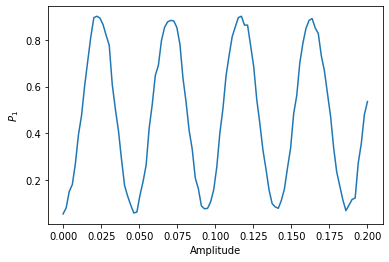

In [5]:
plt.plot(amplitudes, p1)
plt.xlabel(r'Amplitude')
plt.ylabel(r'$P_1$')
plt.show()